<a href="https://colab.research.google.com/github/balamurugan-palaniappan-CEP/AIML_CEP_2021/blob/main/DecisionTree_vs_RandomForest_TA_session_13Nov2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

$\Large{\text{Performance of Random Forest and Decision tree}}$ 

In [ ]:
import numpy as np #numpy package will be useful for most of the array operations in the code 
from sklearn.datasets import load_breast_cancer

In [ ]:
#Let us load the breast cancer data and store the result in X_y variable. The idea behind naming of the variable will be illustrated in the next few tabs.
X_y = load_breast_cancer()

In [ ]:
#Let us print the contents of the X_y variable 

print(type(X_y))
print(X_y)

<class 'sklearn.utils.Bunch'>
{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0

In [ ]:

# Let us now segregate the data attributes and class labels into separate variables 

X = X_y.data
y = X_y.target

print('X shape:', X.shape, 'type(X):', type(X) )
print(' y shape:', y.shape, ' type(y):', type(y))

X shape: (569, 30) type(X): <class 'numpy.ndarray'>
 y shape: (569,)  type(y): <class 'numpy.ndarray'>


In [ ]:
#In the following code, we create a nx1 vector of target labels 
y = np.where(y ==1,y,-1)

In [ ]:
#Thus we see that X and y are numpy ndarrays. 
#We also see that there are 569 samples (or instances) in the data set and each sample has 30 attributes. 
#The shape of target variable y indicates that y contains the labels for these 569 samples

#We can print the unique labels available in y 
print(np.unique(y))
# print (y)

[-1  1]


In [ ]:
np.random.seed(1000)
#Create an index array 
num_samples = X.shape[0]
# print (num_samples)
indexarr = np.arange(num_samples) #index array
np.random.shuffle(indexarr) #shuffle the indices 
#print('shuffled indices of samples:')
#print(indexarr)

In [ ]:
#Use the samples corresponding to first 80% of indexarr for training 
num_train = int(0.8*num_samples)
#Use the remaining 20% samples for testing 
num_test = num_samples-num_train
print('num_train: ',num_train, 'num_test: ', num_test)

num_train:  455 num_test:  114


In [ ]:
#Use the first 80% of indexarr to create the train data features and train labels 
train_X = X[indexarr[0:num_train]]
train_y = y[indexarr[0:num_train]]
print('shape of train data features:')
print(train_X.shape)
print('shape of train data labels')
print(train_y.shape)

shape of train data features:
(455, 30)
shape of train data labels
(455,)


In [ ]:
#Use remaining 20% of indexarr to create the test data and test labels  
test_X = X[indexarr[num_train:num_samples]]
test_y = y[indexarr[num_train:num_samples]]
print('shape of test data features:')
print(test_X.shape)
print('shape of test data labels')
print(test_y.shape)

shape of test data features:
(114, 30)
shape of test data labels
(114,)


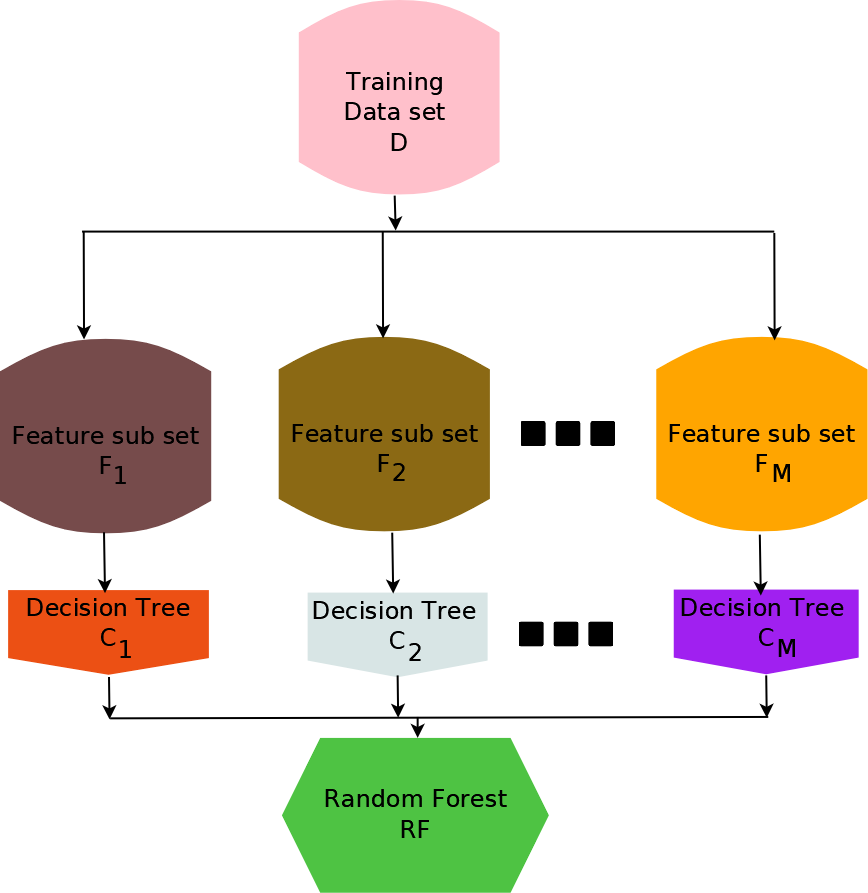

In [ ]:
from urllib.request import urlopen
from PIL import Image

img = Image.open(urlopen('https://github.com/balamurugan-palaniappan-CEP/AIML_CEP_2021/raw/main/images/ensemble_classifier_RF.png'))
img

In [ ]:
#Let us now use cross validation to find random forest hyperparameters.
# We will first find best max depths for a given set of estimators
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import math
import numpy as np

num_features = X.shape[1]
estimators = [5, 10,50,100,150,200]
constant = math.sqrt(num_features)
max_depth = constant*np.array([0.25,0.5, 0.75,1,1.25,1.50,1.75,2])
max_depth = np.ceil(max_depth)
print ('maximum depth', max_depth)
best_depth = {}
cv_k = 5 #5-fold cross validation
for n_estimate in estimators:
  avg_score = np.zeros(len(max_depth))
  # print (avg_score)
  for depth in max_depth:
    clf_rf = RandomForestClassifier(n_estimators = n_estimate,max_depth = depth,  random_state=0)
    scores = cross_val_score(clf_rf, train_X, train_y, cv=cv_k) 
    # print ('scores',scores)
    avg_score[np.where(max_depth==depth)] = np.mean(scores)

  # print ('avg score',avg_score)
  max_score_index = np.argmax(avg_score)
  # print (max_score_index)
  best_depth[n_estimate] = max_depth[int(max_score_index)]

print ('maximum depth = ', best_depth)

maximum depth [ 2.  3.  5.  6.  7.  9. 10. 11.]
maximum depth =  {5: 5.0, 10: 5.0, 50: 6.0, 100: 6.0, 150: 7.0, 200: 6.0}


In [ ]:
## Now let's find the number of estimators
avg_score = np.zeros(len(estimators))
# print (estimators)
for n_estimate in estimators:
    depth = best_depth[n_estimate]
    clf_rf = RandomForestClassifier(n_estimators = n_estimate,max_depth = depth,  random_state=0)
    scores = cross_val_score(clf_rf, train_X, train_y, cv=cv_k) 
    avg_score[estimators.index(n_estimate)] = np.mean(scores)

print ('avg score =',avg_score)
max_score_index = np.argmax(avg_score)
best_estimator = estimators[max_score_index]
best_max_depth = best_depth[best_estimator]
print ('Number of estimators = ',best_estimator)
print ('maximum depth =',best_max_depth)

avg score = [0.95384615 0.95384615 0.96703297 0.96483516 0.96043956 0.96043956]
Number of estimators =  50
maximum depth = 6.0


In [ ]:
# train and test accuracy using random forest classifier
from sklearn.metrics import accuracy_score
clf_rf = RandomForestClassifier(n_estimators = best_estimator,max_depth = best_max_depth,  random_state=0)
clf_model = clf_rf.fit(train_X, train_y)
train_y_predicted = clf_model.predict(train_X)
train_acc_rf = accuracy_score(train_y, train_y_predicted)
test_y_predicted = clf_model.predict(test_X)
test_acc_rf = accuracy_score(test_y, test_y_predicted)
print('train accuracy from Random forest:', train_acc_rf)
print('test accuracy from Random forest:', test_acc_rf)



train accuracy from Random forest: 0.9934065934065934
test accuracy from Random forest: 0.9210526315789473


Let's now compare the performance of random forest classifier with decision tree

In [ ]:
## We will first find the appropriate max depth of decision tree using cross validation.
from sklearn import tree #decision tree from scikit learn 

avg_score = np.zeros(len(max_depth))
for depth in max_depth:
    clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=depth)
    scores = cross_val_score(clf, train_X, train_y, cv=cv_k) 
    avg_score[np.where(max_depth == depth)] = np.mean(scores)

print ('avg score =',avg_score)
max_score_index = np.argmax(avg_score)
best_max_depth = max_depth[max_score_index]
print ('maximum depth =',best_max_depth)

avg score = [0.91868132 0.93186813 0.92967033 0.94065934 0.93846154 0.93406593
 0.93846154 0.93846154]
maximum depth = 6.0


In [ ]:
# train and test accuracy using decision tree

clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=best_max_depth)
clf_model = clf.fit(train_X, train_y)
train_y_predicted = clf_model.predict(train_X)
train_acc = accuracy_score(train_y, train_y_predicted)
test_y_predicted = clf_model.predict(test_X)
test_acc = accuracy_score(test_y, test_y_predicted)
print('train accuracy from decision tree:', train_acc)
print('test accuracy from decision tree:', test_acc)
print ('##############')
print('train accuracy from Random forest:', train_acc_rf)
print('test accuracy from Random forest:', test_acc_rf)

train accuracy from decision tree: 1.0
test accuracy from decision tree: 0.9035087719298246
##############
train accuracy from Random forest: 0.9934065934065934
test accuracy from Random forest: 0.9210526315789473
